# Project 8 - Titanic Dataset

### Dustin Berry

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Get the Data

In [2]:
#read data in
train = pd.read_csv('titanic-train.csv')
#remove irrelevant variables or variables with large amounts of missing data
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Exploratory Data Anaylsis

C:\Users\dusti\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


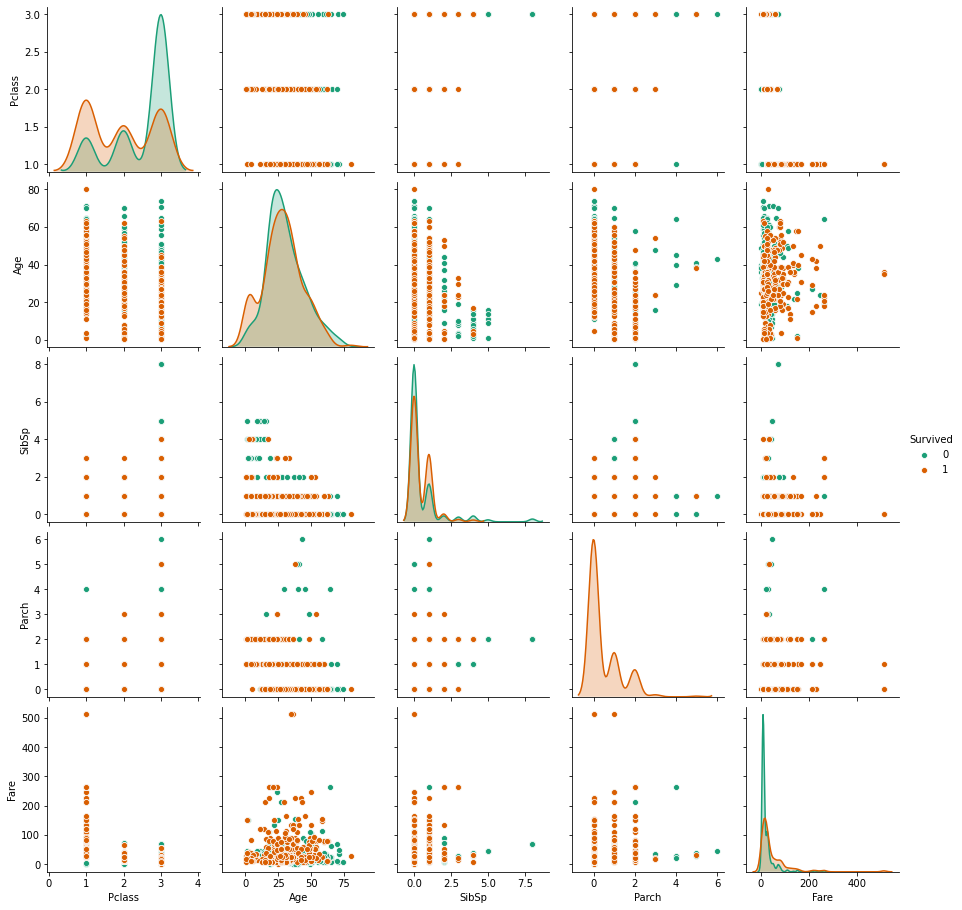

In [3]:
#without deeper analysis it's hard to find meaning in the data provided
m

In [4]:
#find feature types
train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [5]:
train.shape

(891, 8)

In [6]:
#remove outliers based on the interquartile range

Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

train2 = train[~((train < (Q1 - 1.5 * IQR))|(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train2.shape

(598, 8)

In [7]:
#check for missing values
train2.count()

Survived    598
Pclass      598
Sex         598
Age         449
SibSp       598
Parch       598
Fare        598
Embarked    598
dtype: int64

In [8]:
#impute missing values based on the mean of the age
train3 = train2.fillna(train2.mean().round(0))

In [9]:
#recheck for missing values
train3.count()

Survived    598
Pclass      598
Sex         598
Age         598
SibSp       598
Parch       598
Fare        598
Embarked    598
dtype: int64

**Split the Numerical Features from the Categorical Features for Standardization**

In [10]:
#split categorical features from numerical features
train_num = train3[['Pclass','Age', 'SibSp', 'Parch', 'Fare']]
train_cat = train3[['Sex','Embarked']]

y1 = train3[['Survived']]

print("Numerical Feature  Shape:     "+ str(train_num.shape))
print("Categorical Feature  Shape:   "+ str(train_cat.shape))

Numerical Feature  Shape:     (598, 5)
Categorical Feature  Shape:   (598, 2)


In [11]:
train_cat.head()

,Sex,Embarked
0,male,S
2,female,S
3,female,S
4,male,S
5,male,Q


In [12]:
#one-hot encode categorical variables
train_enc = pd.get_dummies(train_cat)
train_enc.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
5,0,1,0,1,0


In [13]:
train_enc = pd.DataFrame(train_enc)
train_enc

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
5,0,1,0,1,0
...,...,...,...,...,...
884,0,1,0,0,1
886,0,1,0,0,1
887,1,0,0,0,1
889,0,1,1,0,0


In [14]:
#standardize numerical data
train_num2 = StandardScaler().fit_transform(train_num)

print("Standardized Feature Array Shape: " + str(train_num.shape))
print('')

#check mean and standard deviation
print(np.mean(train_num2),np.std(train_num2))

Standardized Feature Array Shape: (598, 5)

1.1881985547827762e-17 0.8944271909999159


In [15]:
train_num3 = pd.DataFrame(train_num2)
train_num3

,0,1,2,3,4
0,0.701820,-0.915406,1.842747,0.0,-0.628639
1,0.701820,-0.512637,-0.438749,0.0,-0.574901
2,-1.954436,0.393592,1.842747,0.0,3.021595
3,0.701820,0.393592,-0.438749,0.0,-0.564949
4,0.701820,-0.009177,-0.438749,0.0,-0.532444
...,...,...,...,...,...
593,0.701820,-0.613329,-0.438749,0.0,-0.644562
594,-0.626308,-0.411945,-0.438749,0.0,-0.170867
595,-1.954436,-1.217482,-0.438749,0.0,1.182546
596,-1.954436,-0.512637,-0.438749,0.0,1.182546


In [16]:
#combine the numerical and categrical datasets
norm_train = pd.DataFrame(np.hstack([train_num3, train_enc]))

print("Feature Shape: " + str(norm_train.shape))

Feature Shape: (598, 10)


In [17]:
norm_train.head()

,0,1,2,3,4,5,6,7,8,9
0,0.701820,-0.915406,1.842747,0.0,-0.628639,0.0,1.0,0.0,0.0,1.0
1,0.701820,-0.512637,-0.438749,0.0,-0.574901,1.0,0.0,0.0,0.0,1.0
2,-1.954436,0.393592,1.842747,0.0,3.021595,1.0,0.0,0.0,0.0,1.0
3,0.701820,0.393592,-0.438749,0.0,-0.564949,0.0,1.0,0.0,0.0,1.0
4,0.701820,-0.009177,-0.438749,0.0,-0.532444,0.0,1.0,0.0,1.0,0.0


In [18]:
#rename the columns
norm_train = norm_train.rename(columns = {norm_train.columns[0]:'Pclass',
                                 norm_train.columns[1]:'Age',
                                 norm_train.columns[2]:'SibSp', 
                                 norm_train.columns[3]:'Parch',
                                 norm_train.columns[4]:'Fare', 
                                 norm_train.columns[5]:'Sex_female', 
                                 norm_train.columns[6]:'Sex_male', 
                                 norm_train.columns[7]:'Embarked_C', 
                                 norm_train.columns[8]:'Embarked_Q', 
                                 norm_train.columns[9]:'Embarked_S',})

norm_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.701820,-0.915406,1.842747,0.0,-0.628639,0.0,1.0,0.0,0.0,1.0
1,0.701820,-0.512637,-0.438749,0.0,-0.574901,1.0,0.0,0.0,0.0,1.0
2,-1.954436,0.393592,1.842747,0.0,3.021595,1.0,0.0,0.0,0.0,1.0
3,0.701820,0.393592,-0.438749,0.0,-0.564949,0.0,1.0,0.0,0.0,1.0
4,0.701820,-0.009177,-0.438749,0.0,-0.532444,0.0,1.0,0.0,1.0,0.0


## Performing Principal Component Analysis

In [19]:
pca = PCA(n_components=0.95)
principalComponents_train = pca.fit_transform(norm_train)

In [20]:
print(principalComponents_train.shape)

(598, 6)


In [21]:
#renaming and passing to a dataframe
principalComponents_train_Df = pd.DataFrame(data = principalComponents_train
             , columns = ['p_c_1', 'p_c_2','p_c_3','p_c_4','p_c_5','p_c_6'])
principalComponents_train_Df.head()

,p_c_1,p_c_2,p_c_3,p_c_4,p_c_5,p_c_6
0,-0.763160,1.876955,0.591623,-0.721935,-0.495775,-0.333348
1,-1.078639,0.077429,-0.155651,0.847166,-0.379388,0.624930
2,3.724542,1.681520,-0.493478,0.508856,-0.137356,0.713053
3,-0.731626,-0.605050,0.526597,-0.352508,0.022588,0.247639
4,-0.936729,-0.336994,0.261120,0.146411,0.775633,-0.330411


In [22]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.41418536 0.23191504 0.1438108  0.07818851 0.05833687 0.05102049]


In [23]:
np.sum(np.array([0.41418536, 0.23191504, 0.1438108,  0.07818851, 0.05833687, 0.05102049]))

0.97745707

**Screeplot of PCA**

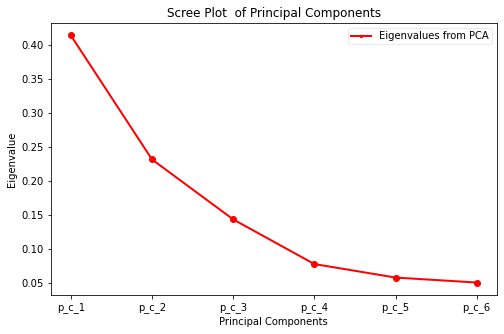

In [24]:
fig = plt.figure(figsize=(8,5))
plt.plot(principalComponents_train_Df.columns, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalue') 
plt.title('Scree Plot  of Principal Components')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3, 
                 shadow=False,markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

In [25]:
#checking principal components the the variables for correlation
df_comp = pd.DataFrame(pca.components_,index=list(['component 0', 'component 1', 'component 2',
                                                  'component 3','component 4', 'component 5']))
components = df_comp.sort_values(by ='component 0', axis=1,ascending=False).round(decimals=6)
components.transpose()

#the components are not correlated, and can be used for modelling

,component 0,component 1,component 2,component 3,component 4,component 5
4,0.624123,0.192302,-0.299081,-0.095691,0.493108,0.481063
1,0.410199,-0.496756,0.752896,0.072948,0.078444,0.066879
2,0.238951,0.808242,0.452123,-0.122741,-0.168431,-0.202851
7,0.024073,0.023463,-0.045785,0.122515,0.330119,-0.405386
9,0.018051,-0.042595,-0.000851,-0.326963,-0.549365,0.486068
5,0.015466,0.117109,-0.001464,0.632415,-0.162991,0.221343
3,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000
6,-0.015466,-0.117109,0.001464,-0.632415,0.162991,-0.221343
8,-0.042124,0.019132,0.046637,0.204448,0.219245,-0.080682
0,-0.618022,0.181213,0.367432,-0.082736,0.458630,0.466756


## Prep Test Data for SVM Modelling

In [26]:
#read data in
test = pd.read_csv('titanic-test.csv')
#remove irrelevant variables or variables with large amounts of missing data
test2 = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1)
test2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


**Due to the test data not having the same features as the training data it must be transformed.**

In [27]:
test2.count()

Pclass      418
Sex         418
Age         332
SibSp       418
Parch       418
Fare        417
Embarked    418
dtype: int64

In [28]:
#impute missing values based on the mean of the age and fare
test3 = test2.fillna(test2.mean().round(0))
test3.count()

Pclass      418
Sex         418
Age         418
SibSp       418
Parch       418
Fare        418
Embarked    418
dtype: int64

In [29]:
#split categorical features from numerical features
test_num = test3[['Pclass','Age', 'SibSp', 'Parch', 'Fare']]
test_cat = test3[['Sex','Embarked']]

print("Numerical Feature  Shape:     "+ str(test_num.shape))
print("Categorical Feature  Shape:   "+ str(test_cat.shape))

Numerical Feature  Shape:     (418, 5)
Categorical Feature  Shape:   (418, 2)


In [30]:
#one-hot encode categorical variables
test_enc = pd.get_dummies(test_cat)
test_enc.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,1,0
1,1,0,0,0,1
2,0,1,0,1,0
3,0,1,0,0,1
4,1,0,0,0,1


In [31]:
test_enc = pd.DataFrame(test_enc)

In [32]:
#standardize numerical data
test_num2 = StandardScaler().fit_transform(test_num)

print("Standardized Feature Array Shape: " + str(test_num.shape))
print('')

#check mean and standard deviation
print(np.mean(test_num2),np.std(test_num2))

Standardized Feature Array Shape: (418, 5)

1.912345879737112e-17 1.0


In [33]:
test_num3 = pd.DataFrame(test_num2)
test_num3

,0,1,2,3,4
0,0.873482,0.339424,-0.499470,-0.400248,-0.498423
1,0.873482,1.329924,0.616992,-0.400248,-0.513290
2,-0.315819,2.518523,-0.499470,-0.400248,-0.465104
3,0.873482,-0.254876,-0.499470,-0.400248,-0.483482
4,0.873482,-0.651076,0.616992,0.619896,-0.418487
...,...,...,...,...,...
413,0.873482,-0.017156,-0.499470,-0.400248,-0.494464
414,-1.505120,0.696004,-0.499470,-0.400248,1.313737
415,0.873482,0.656384,-0.499470,-0.400248,-0.508808
416,0.873482,-0.017156,-0.499470,-0.400248,-0.494464


In [34]:
#combine the numerical and categrical datasets
norm_test = pd.DataFrame(np.hstack([test_num3, test_enc]))

print("Feature Shape: " + str(norm_test.shape))

Feature Shape: (418, 10)


In [35]:
norm_test.head()

,0,1,2,3,4,5,6,7,8,9
0,0.873482,0.339424,-0.499470,-0.400248,-0.498423,0.0,1.0,0.0,1.0,0.0
1,0.873482,1.329924,0.616992,-0.400248,-0.513290,1.0,0.0,0.0,0.0,1.0
2,-0.315819,2.518523,-0.499470,-0.400248,-0.465104,0.0,1.0,0.0,1.0,0.0
3,0.873482,-0.254876,-0.499470,-0.400248,-0.483482,0.0,1.0,0.0,0.0,1.0
4,0.873482,-0.651076,0.616992,0.619896,-0.418487,1.0,0.0,0.0,0.0,1.0


In [36]:
#rename the columns
norm_test = norm_test.rename(columns = {norm_test.columns[0]:'Pclass',
                                 norm_test.columns[1]:'Age',
                                 norm_test.columns[2]:'SibSp', 
                                 norm_test.columns[3]:'Parch',
                                 norm_test.columns[4]:'Fare', 
                                 norm_test.columns[5]:'Sex_female', 
                                 norm_test.columns[6]:'Sex_male', 
                                 norm_test.columns[7]:'Embarked_C', 
                                 norm_test.columns[8]:'Embarked_Q', 
                                 norm_test.columns[9]:'Embarked_S',})

norm_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.339424,-0.499470,-0.400248,-0.498423,0.0,1.0,0.0,1.0,0.0
1,0.873482,1.329924,0.616992,-0.400248,-0.513290,1.0,0.0,0.0,0.0,1.0
2,-0.315819,2.518523,-0.499470,-0.400248,-0.465104,0.0,1.0,0.0,1.0,0.0
3,0.873482,-0.254876,-0.499470,-0.400248,-0.483482,0.0,1.0,0.0,0.0,1.0
4,0.873482,-0.651076,0.616992,0.619896,-0.418487,1.0,0.0,0.0,0.0,1.0


In [37]:
norm_test = pd.DataFrame(norm_test)
norm_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.339424,-0.499470,-0.400248,-0.498423,0.0,1.0,0.0,1.0,0.0
1,0.873482,1.329924,0.616992,-0.400248,-0.513290,1.0,0.0,0.0,0.0,1.0
2,-0.315819,2.518523,-0.499470,-0.400248,-0.465104,0.0,1.0,0.0,1.0,0.0
3,0.873482,-0.254876,-0.499470,-0.400248,-0.483482,0.0,1.0,0.0,0.0,1.0
4,0.873482,-0.651076,0.616992,0.619896,-0.418487,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,0.873482,-0.017156,-0.499470,-0.400248,-0.494464,0.0,1.0,0.0,0.0,1.0
414,-1.505120,0.696004,-0.499470,-0.400248,1.313737,1.0,0.0,1.0,0.0,0.0
415,0.873482,0.656384,-0.499470,-0.400248,-0.508808,0.0,1.0,0.0,0.0,1.0
416,0.873482,-0.017156,-0.499470,-0.400248,-0.494464,0.0,1.0,0.0,0.0,1.0


## Run the SVM Model

**Train the model**

In [38]:
from sklearn.svm import SVC

In [39]:
svc_model = SVC()

In [40]:
y1 = np.ravel(y1)

svc_model.fit(norm_train,y1)

SVC()

**Use the model to predict based on the test set**

In [41]:
predictions = svc_model.predict(norm_test)
print(predictions)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


**In this example we can't run a confusion matrix to test the prediction accuracy because we don't have the original data to crossreference the prediction output against.**

## Below is a final dataset with the prediction of survival appended each person's name and Passenger ID number.

In [42]:
names = test['Name']
passengerid = test['PassengerId']

finalDf = pd.DataFrame(passengerid)
finalDf['SurvivedPrediction'] = predictions
finalDf['Name'] = names

finalDf = finalDf[['Name', 'PassengerId', 'SurvivedPrediction']]

def highlight_max(s):
    is_min = s == 0
    return ['background-color: lightcoral' if v else '' for v in is_min]

finalDf.style.apply(highlight_max)

,Name,PassengerId,SurvivedPrediction
0,"Kelly, Mr. James",892,0
1,"Wilkes, Mrs. James (Ellen Needs)",893,0
2,"Myles, Mr. Thomas Francis",894,0
3,"Wirz, Mr. Albert",895,0
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",896,1
5,"Svensson, Mr. Johan Cervin",897,0
6,"Connolly, Miss. Kate",898,1
7,"Caldwell, Mr. Albert Francis",899,0
8,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",900,1
9,"Davies, Mr. John Samuel",901,0


## Gridsearch

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [45]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(norm_train,y1)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] 

[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s
[CV] C=100, gamma=0.001 ..............................................
[CV] ............................... C=100, gamma=0.001, total=   0.0s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [46]:
grid_predictions = grid.predict(norm_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
#confucion matrix
print(confusion_matrix(predictions,grid_predictions))

[[262  10]
 [  4 142]]


In [49]:
print(classification_report(predictions,grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       272
           1       0.93      0.97      0.95       146

    accuracy                           0.97       418
   macro avg       0.96      0.97      0.96       418
weighted avg       0.97      0.97      0.97       418

